## Credit Card Fraud Detection using Neural Network
***
***

#### The Credit Card Dataset used in this model contains transactions made in two days by European credit cards holders in September 2013. In total, there are 492 frauds out of 284,807 transactions.

- The data consists of 28 variables (V1, …, V28), an "Amount" field, a "Time" field and a "Class" field. 

- The feature **`Amount`** is the transaction amount

- The **`Time`** field contains the seconds elapsed between each transaction and the first transaction in the dataset.

- The **`Class`** field takes values 0 (when transaction is not fraudulent) and value 1 (when transaction is fraudulent). 

- The representation and meaning of the **`28 Variables`** are anonymous for privacy reasons [Features V1, V2, … V28 are the principal components obtained with PCA].


***
***
In most fraud detection machine learning models, their are certain features which are paramount for the model efficient. These features can be used for example-dependant and cost-senstive learning. They include:

<img src="fd1.png" width=600 height=600 />

#### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

#### Import Data

In [2]:
data = pd.read_csv("creditcard.csv")

data.drop('Time', axis = 1, inplace = True)

data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Data Exploration

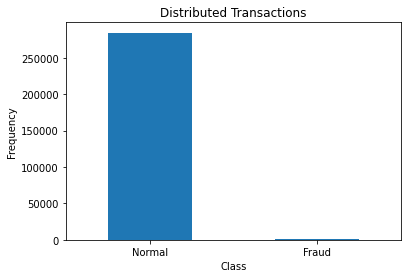

In [3]:
# plot normal and fraud
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Distributed Transactions")
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [4]:
print(data.shape)
print()
print(data.describe())

(284807, 30)

                 V1            V2            V3            V4            V5  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15  9.604066e-16   
std    1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00  1.380247e+00   
min   -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%   -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%    1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01  6.119264e-01   
max    2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01  3.480167e+01   

                 V6            V7            V8            V9           V10  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15  2.239751e-15   
std    1.332271e+00  1.237094e+00  1.

In [5]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlierFraction = len(fraud)/float(len(valid))

print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [6]:
print("Amount details of the fraudulent transaction")

fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
print("details of valid transaction")

valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

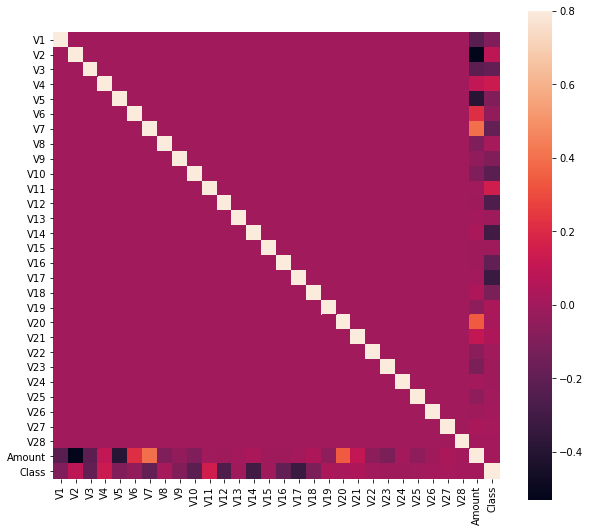

In [8]:
# Correlation matrix - heatmap
corrmat = data.corr()
fig = plt.figure(figsize = (10, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

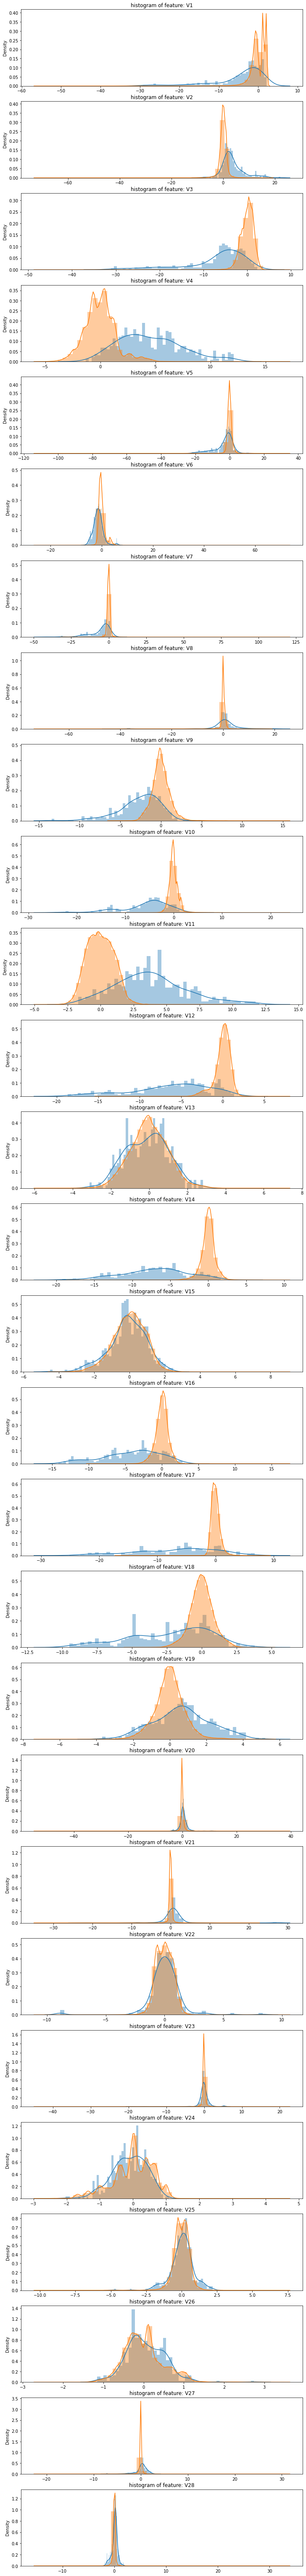

In [9]:
# distribution of anomalous features
features = data.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)

for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[c][data.Class == 1], bins=50)
    sns.distplot(data[c][data.Class == 0], bins=50)
    ax.set_xlabel("")
    ax.set_title("histogram of feature: " + str(c))
    
plt.show()

#### Data Preprocessing

In [3]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]

print(X.shape)
print(Y.shape)


# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(284807, 29)
(284807,)


#### Split Data into Train and Test

In [4]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

#### Standardize features using MinMaxScaler

In [5]:
scaler = MinMaxScaler()

scaler.fit(xTrain)

xTrain = scaler.transform(xTrain)
xTest = scaler.transform(xTest)

#### Build Model

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [7]:
model = Sequential() 

model.add(Dense(units=200, input_dim=29, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=200,  kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, kernel_initializer='uniform',activation='sigmoid'))

print(model.summary()) 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               6000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 46,401
Trainable params: 46,401
Non-trainable params: 0
_________________________________________________________________
None


#### Train Model

In [8]:
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
history = model.fit(x=xTrain, y=yTrain, validation_split=0.2, epochs=50, batch_size=500, verbose=1)


Train on 182276 samples, validate on 45569 samples
Epoch 1/50
182276/182276 [==============================] - 1s 7us/step - loss: 0.0346 - accuracy: 0.9974 - val_loss: 0.0119 - val_accuracy: 0.9981
Epoch 2/50
182276/182276 [==============================] - 1s 5us/step - loss: 0.0099 - accuracy: 0.9983 - val_loss: 0.0071 - val_accuracy: 0.9981
Epoch 3/50
182276/182276 [==============================] - 1s 5us/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.0039 - val_accuracy: 0.9990
Epoch 4/50
182276/182276 [==============================] - 1s 5us/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0036 - val_accuracy: 0.9991
Epoch 5/50
182276/182276 [==============================] - 1s 5us/step - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 6/50
182276/182276 [==============================] - 1s 5us/step - loss: 0.0041 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 7/50
182276/182276 [==============================] - 

In [10]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

#### Evaluation Graph

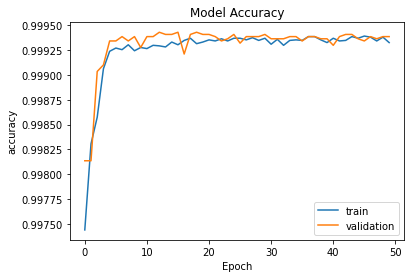

In [11]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel("accuracy")
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

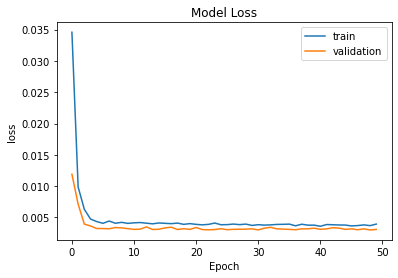

In [12]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('Model Loss')
plt.ylabel("loss")
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

#### Model Predictions


In [13]:
yPred = model.predict(xTest)

#### Model Metrics Evaluation

In [14]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [15]:
acc = accuracy_score(yTest, yPred.round())
print("Accuracy: {:.2f}%".format(acc * 100))

prec = precision_score(yTest, yPred.round())
print("Precision: {:.2f}%".format(prec * 100))

rec = recall_score(yTest, yPred.round())
print("Recall: {:.2f}%".format(rec * 100))

f1 = f1_score(yTest, yPred.round())
print("F1 Score: {:.2f}%".format(f1 * 100))

Accuracy: 99.94%
Precision: 83.70%
Recall: 78.57%
F1 Score: 81.05%


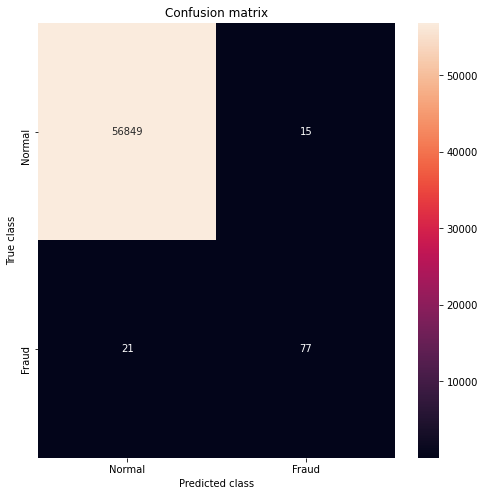

In [16]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']

conf_matrix = confusion_matrix(yTest, yPred.round())

plt.figure(figsize =(8, 8))

sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");

plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

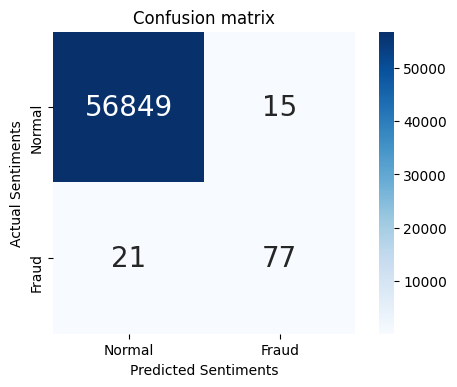

In [17]:
# Print confusion matrix for logistic regression model
def show_graph(data, pred):
    confusion = confusion_matrix(data, pred)

    plt.figure(dpi=100)
    sns.heatmap(confusion, cmap=plt.cm.Blues, annot=True, square=True,
                xticklabels=['Normal','Fraud'],
                yticklabels=['Normal','Fraud'],
                fmt='d', annot_kws={'fontsize':20})

    plt.xticks(rotation=0)
    plt.title('Confusion matrix')
    plt.xlabel('Predicted Sentiments')
    plt.ylabel('Actual Sentiments')
    plt.show()
    

show_graph(yTest, yPred.round())

In [18]:
from sklearn.metrics import classification_report

cf = classification_report(yTest, yPred.round())

print(cf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.79      0.81        98

    accuracy                           1.00     56962
   macro avg       0.92      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962

